#### Library

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# imblearn


# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black


# for Sampling
import imblearn

<IPython.core.display.Javascript object>

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    StackingRegressor,
)
from xgboost import XGBRegressor
from sklearn.ensemble import StackingClassifier

<IPython.core.display.Javascript object>

In [3]:
# Loading the dataset - sheet_name parameter is used if there are multiple tabs in the excel file.
credit = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

In [4]:
data = credit.copy()

<IPython.core.display.Javascript object>

In [5]:
data.shape

(10127, 21)

<IPython.core.display.Javascript object>

In [6]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


<IPython.core.display.Javascript object>

In [7]:
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


<IPython.core.display.Javascript object>

### Data Clean Up:

In [8]:
# checking for duplicates
data[data.duplicated()].count()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<IPython.core.display.Javascript object>

- there are no duplicates

Now CLIENTNUM can be dropped.

In [9]:
# drop the CustomerID. column as it does not add any value to the analysis
data.drop("CLIENTNUM", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [10]:
data.shape

(10127, 20)

<IPython.core.display.Javascript object>

- Dropping CLIENTNUM was succesful because shape of column changed.

In [11]:
# checking for missing values in the data
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

In [12]:
pd.DataFrame(
    data={
        "% of Missing Values": round(data.isna().sum() / data.isna().count() * 100, 2)
    }
)

,% of Missing Values
Attrition_Flag,0.000
Customer_Age,0.000
Gender,0.000
Dependent_count,0.000
Education_Level,15.000
Marital_Status,7.400
Income_Category,0.000
Card_Category,0.000
Months_on_book,0.000
Total_Relationship_Count,0.000


<IPython.core.display.Javascript object>

In [13]:
# Dropping null values
data = data.dropna()

<IPython.core.display.Javascript object>

In [14]:
data.shape

(7973, 20)

<IPython.core.display.Javascript object>

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7973 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            7973 non-null   object 
 1   Customer_Age              7973 non-null   int64  
 2   Gender                    7973 non-null   object 
 3   Dependent_count           7973 non-null   int64  
 4   Education_Level           7973 non-null   object 
 5   Marital_Status            7973 non-null   object 
 6   Income_Category           7973 non-null   object 
 7   Card_Category             7973 non-null   object 
 8   Months_on_book            7973 non-null   int64  
 9   Total_Relationship_Count  7973 non-null   int64  
 10  Months_Inactive_12_mon    7973 non-null   int64  
 11  Contacts_Count_12_mon     7973 non-null   int64  
 12  Credit_Limit              7973 non-null   float64
 13  Total_Revolving_Bal       7973 non-null   int64  
 14  Avg_Ope

<IPython.core.display.Javascript object>

In [16]:
data["Gender"].nunique()

2

<IPython.core.display.Javascript object>

In [17]:
# is male
data.replace(("M", "F"), (1, 0), inplace=True)

<IPython.core.display.Javascript object>

In [18]:
data["Attrition_Flag"].nunique()

2

<IPython.core.display.Javascript object>

In [19]:
# Is Existing Customer
data.replace(("Existing Customer", "Attrited Customer"), (1, 0), inplace=True)

<IPython.core.display.Javascript object>

In [20]:
data.tail()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10120,1,54,1,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.000,2109,11831.000,0.660,15577,114,0.754,0.151
10121,1,56,0,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.000,606,3082.000,0.570,14596,120,0.791,0.164
10122,1,50,1,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10124,0,44,0,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10126,0,43,0,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


<IPython.core.display.Javascript object>

In [21]:
# filtering non-numeric columns
cat_columns = data.select_dtypes(exclude=np.number).columns
cat_columns

Index(['Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

<IPython.core.display.Javascript object>

In [22]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Attrition_Flag",
    "Gender",
]

<IPython.core.display.Javascript object>

In [23]:
data[cat_cols].nunique()

Education_Level    6
Marital_Status     3
Income_Category    6
Card_Category      4
Attrition_Flag     2
Gender             2
dtype: int64

<IPython.core.display.Javascript object>

In [24]:
# looking at value counts for non-numeric features

num_to_display = 19  # defining this up here so it's easy to change later if I want
for colname in data.dtypes[data.dtypes == "object"].index:
    val_counts = data[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("\n\n")  # just for more space between

Graduate         2901
High School      1859
Uneducated       1378
College           939
Post-Graduate     473
Doctorate         423
Name: Education_Level, dtype: int64



Married     3999
Single      3322
Divorced     652
Name: Marital_Status, dtype: int64



Less than $40K    2792
$40K - $60K       1412
$80K - $120K      1202
$60K - $80K       1103
abc                892
$120K +            572
Name: Income_Category, dtype: int64



Blue        7441
Silver       428
Gold          88
Platinum      16
Name: Card_Category, dtype: int64





<IPython.core.display.Javascript object>

In [25]:
# Converting the data type of each categorical variable to 'category'
for column in cat_cols:
    data[column] = data[column].astype("category")

<IPython.core.display.Javascript object>

In [26]:
# drop abc rows
data = data[data.Income_Category != "abc"]

<IPython.core.display.Javascript object>

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            7081 non-null   category
 1   Customer_Age              7081 non-null   int64   
 2   Gender                    7081 non-null   category
 3   Dependent_count           7081 non-null   int64   
 4   Education_Level           7081 non-null   category
 5   Marital_Status            7081 non-null   category
 6   Income_Category           7081 non-null   category
 7   Card_Category             7081 non-null   category
 8   Months_on_book            7081 non-null   int64   
 9   Total_Relationship_Count  7081 non-null   int64   
 10  Months_Inactive_12_mon    7081 non-null   int64   
 11  Contacts_Count_12_mon     7081 non-null   int64   
 12  Credit_Limit              7081 non-null   float64 
 13  Total_Revolving_Bal       7081 non-null   int64

<IPython.core.display.Javascript object>

- Total memory decreased from 1.3 MB to 872.3 KB.

In [28]:
data.shape

(7081, 20)

<IPython.core.display.Javascript object>

#### Summary of the data

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,7081.000,46.348,8.041,26.000,41.000,46.000,52.000,73.000
Dependent_count,7081.000,2.338,1.292,0.000,1.000,2.000,3.000,5.000
Months_on_book,7081.000,35.981,8.003,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,7081.000,3.819,1.544,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,7081.000,2.343,0.995,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,7081.000,2.454,1.105,0.000,2.000,2.000,3.000,6.000
Credit_Limit,7081.000,8492.774,9126.073,1438.300,2498.000,4287.000,10729.000,34516.000
Total_Revolving_Bal,7081.000,1167.502,812.316,0.000,463.000,1282.000,1781.000,2517.000
Avg_Open_To_Buy,7081.000,7325.272,9131.218,3.000,1248.000,3250.000,9491.000,34516.000
Total_Amt_Chng_Q4_Q1,7081.000,0.761,0.223,0.000,0.629,0.735,0.858,3.397


<IPython.core.display.Javascript object>

### EDA

#### Univariate analysis

In [30]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

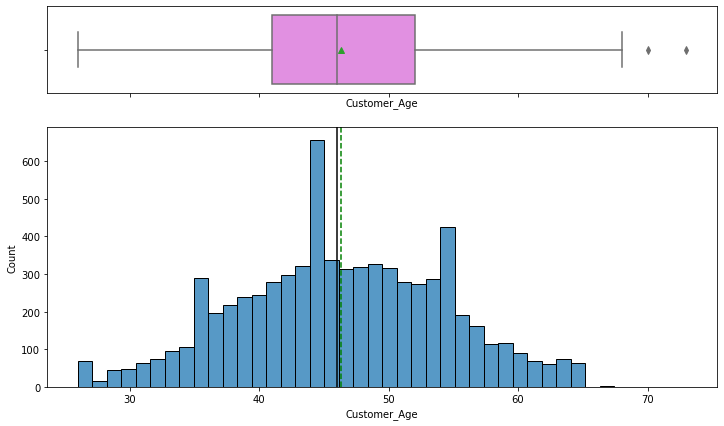

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(data, "Customer_Age")

- Age is almost balanced but still slightly right skewed.

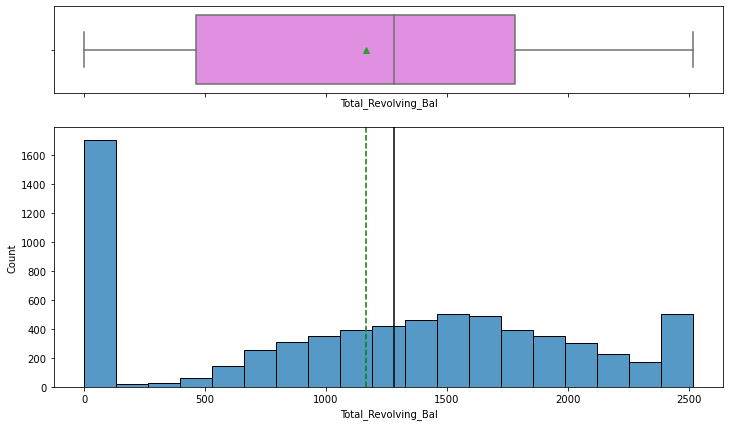

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(data, "Total_Revolving_Bal")

- Balanced

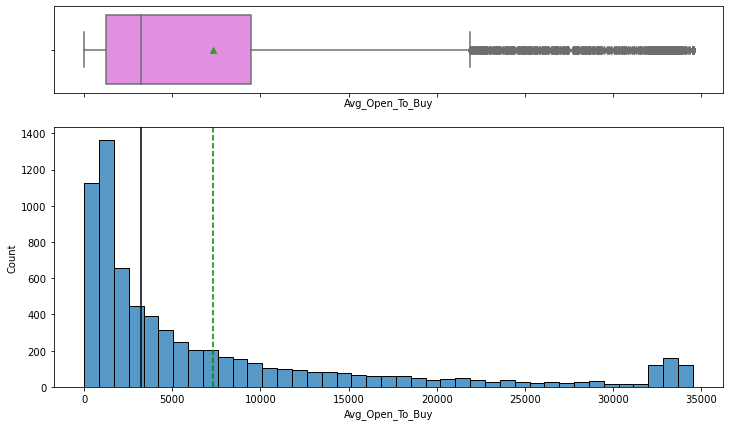

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(data, "Avg_Open_To_Buy")

- Right skewed.

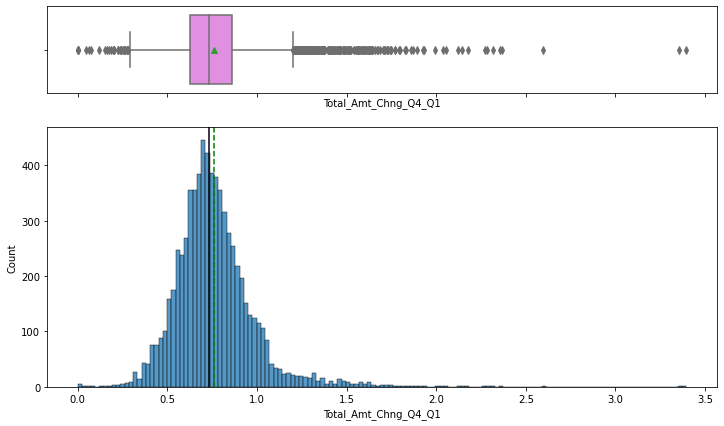

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

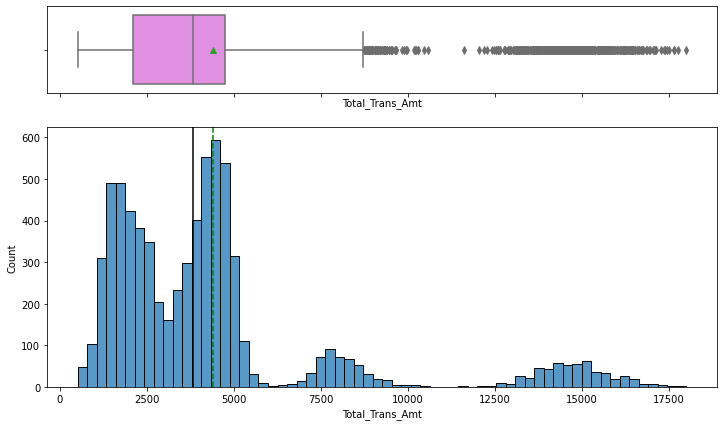

<IPython.core.display.Javascript object>

In [35]:
histogram_boxplot(data, "Total_Trans_Amt")

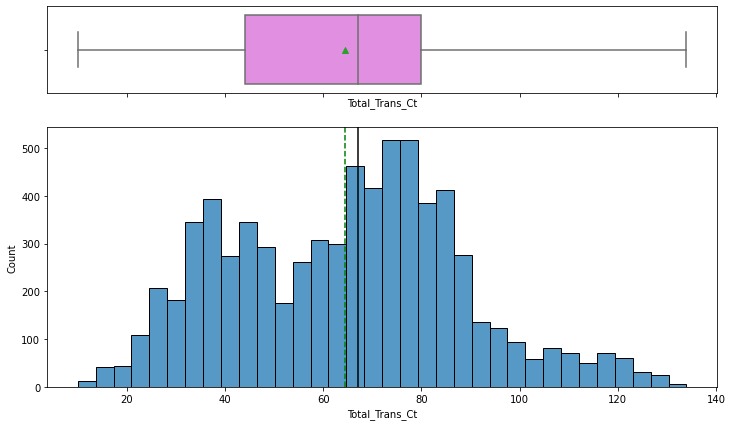

<IPython.core.display.Javascript object>

In [36]:
histogram_boxplot(data, "Total_Trans_Ct")

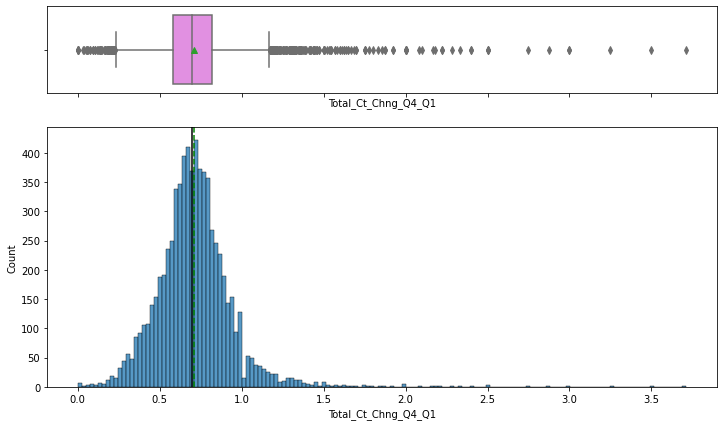

<IPython.core.display.Javascript object>

In [37]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

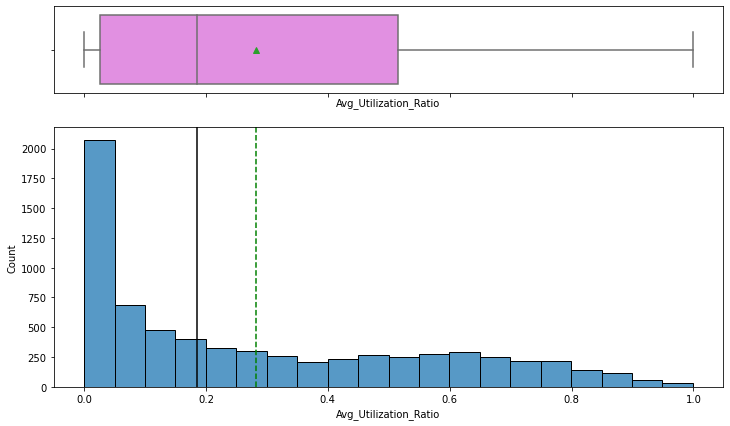

<IPython.core.display.Javascript object>

In [38]:
histogram_boxplot(data, "Avg_Utilization_Ratio")

#### Bivariate

##### What card does has the most loyal customers?

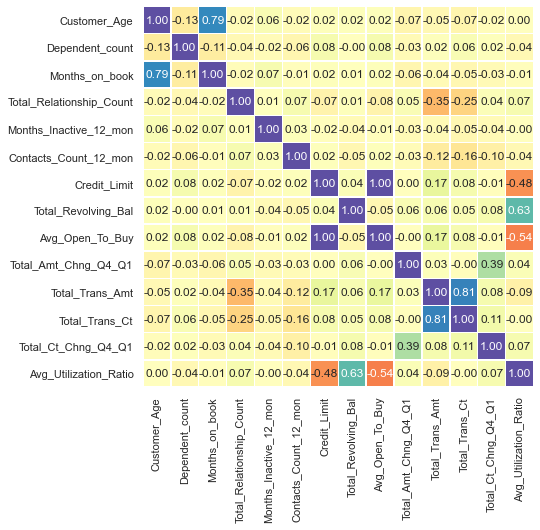

<IPython.core.display.Javascript object>

In [39]:
sns.set(rc={"figure.figsize": (7, 7)})
sns.heatmap(
    data.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="Spectral",
    fmt="0.2f",
)
plt.show()

- Total revolving balance and Avg_Ultiization_Ratio have the highest positive correlation. 

#### Split Data:

In [40]:
data1 = data.copy()

<IPython.core.display.Javascript object>

In [41]:
X = data1.drop(columns="Attrition_Flag")
X = pd.get_dummies(X)

y = data1["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [42]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=5, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(4531, 35) (1133, 35) (1417, 35)


<IPython.core.display.Javascript object>

In [43]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
1   0.843
0   0.157
Name: Attrition_Flag, dtype: float64
********************************************************************************
Target value ratio in y_train
1   0.843
0   0.157
Name: Attrition_Flag, dtype: float64
********************************************************************************
Target value ratio in y_val
1   0.843
0   0.157
Name: Attrition_Flag, dtype: float64
********************************************************************************
Target value ratio in y_test
1   0.843
0   0.157
Name: Attrition_Flag, dtype: float64
********************************************************************************


<IPython.core.display.Javascript object>

#### Storing the models:

In [44]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 97.17236315728078
Random forest: 98.87413969382364
Logistic Regression: 96.4653510186437
GBM: 98.87413969382364
Adaboost: 97.93138822366932
Xgboost: 98.6385375995828

Training Performance:

Bagging: 99.8167059439644
Random forest: 100.0
Logistic Regression: 96.62215239591517
GBM: 99.45011783189317
Adaboost: 98.27179890023567
Xgboost: 100.0


<IPython.core.display.Javascript object>

##### Plotting the models:

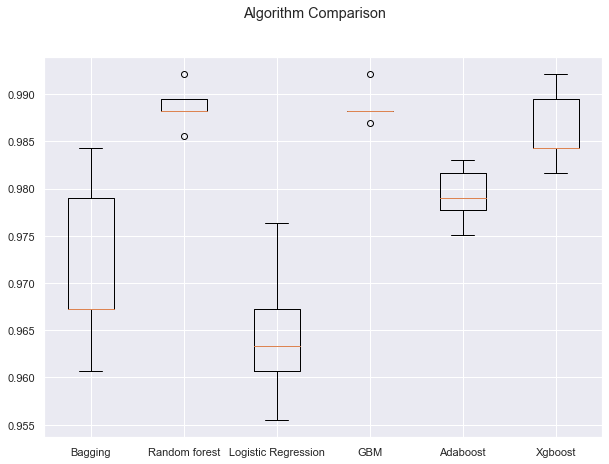

<IPython.core.display.Javascript object>

In [45]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- Random Forest, GBM, and Xgboost will be tuned. because they have the best performance.

#### Functions:

In [46]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_r2 = metrics.r2_score(y_train, pred_train)
    test_r2 = metrics.r2_score(y_test, pred_test)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_test))

    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True:
        print("R-sqaure on training set : ", metrics.r2_score(y_train, pred_train))
        print("R-square on test set : ", metrics.r2_score(y_test, pred_test))
        print(
            "RMSE on training set : ",
            np.sqrt(metrics.mean_squared_error(y_train, pred_train)),
        )
        print(
            "RMSE on test set : ",
            np.sqrt(metrics.mean_squared_error(y_test, pred_test)),
        )

    # returning the list with train and test scores
    return score_list

<IPython.core.display.Javascript object>

In [47]:
# For Hyperparameter Tuning
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [48]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [49]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

#### Logistic Regression:

In [50]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

model = LogisticRegression(solver="newton-cg", random_state=1)
lg = model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [51]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_0,Gender_1,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
coef,-0.004,-0.138,0.006,0.359,-0.590,-0.566,0.000,0.001,-0.000,0.417,-0.000,0.107,2.134,0.269,-1.037,-0.298,-0.124,-0.472,-0.169,-0.115,-0.270,-0.184,-0.450,-0.150,-0.735,-0.446,-0.072,-0.204,-0.456,-0.157,0.000,-0.389,-0.463,-0.090,-0.392


<IPython.core.display.Javascript object>

In [52]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_0,Gender_1,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
Odds,0.996,0.871,1.006,1.432,0.554,0.568,1.000,1.001,1.000,1.517,1.000,1.113,8.449,1.308,0.355,0.742,0.883,0.623,0.845,0.892,0.763,0.832,0.638,0.861,0.480,0.640,0.930,0.816,0.634,0.855,1.000,0.678,0.630,0.914,0.676
Change_odd%,-0.354,-12.900,0.615,43.210,-44.585,-43.214,0.031,0.062,-0.031,51.737,-0.045,11.284,744.934,30.805,-64.533,-25.764,-11.671,-37.651,-15.519,-10.843,-23.669,-16.845,-36.221,-13.943,-52.030,-35.985,-6.959,-18.414,-36.627,-14.502,0.000,-32.248,-37.049,-8.647,-32.425


<IPython.core.display.Javascript object>

#### Bagging Classifier:

In [53]:
# base_estimator for bagging classifier is a decision tree by default
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [54]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train, bagging.predict(X_train)))
print(recall_score(y_val, bagging.predict(X_val)))
print("")

# Checking Precision score on train and validation set
print("Precision on train and validation set")
print(precision_score(y_train, bagging.predict(X_train)))
print(precision_score(y_val, bagging.predict(X_val)))

print("")

# Checking Accuracy score on train and validation set
print("Accuracy on train and validation set")
print(accuracy_score(y_train, bagging.predict(X_train)))
print(accuracy_score(y_val, bagging.predict(X_val)))

Recall on train and validation set
0.9981670594396439
0.981151832460733

Precision on train and validation set
0.9994756161510225
0.9689762150982419

Accuracy on train and validation set
0.9980136835135731
0.9576345984112974


<IPython.core.display.Javascript object>

#### Random Forest

In [55]:
# model without hyperparameter tuning
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [56]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train, rf.predict(X_train)))
print(recall_score(y_val, rf.predict(X_val)))
print("")

# Checking Precision score on train and validation set
print("Precision on train and validation set")
print(precision_score(y_train, rf.predict(X_train)))
print(precision_score(y_val, rf.predict(X_val)))

print("")

# Checking Accuracy score on train and validation set
print("Accuracy on train and validation set")
print(accuracy_score(y_train, rf.predict(X_train)))
print(accuracy_score(y_val, rf.predict(X_val)))

Recall on train and validation set
1.0
0.9863874345549738

Precision on train and validation set
1.0
0.9467336683417086

Accuracy on train and validation set
1.0
0.941747572815534


<IPython.core.display.Javascript object>

#### Adaboost

In [57]:
ab_regressor = AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

<IPython.core.display.Javascript object>

#### Gradient Boosting Regressor:

In [58]:
gb_estimator = GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

<IPython.core.display.Javascript object>

#### XGBoost:

In [59]:
xgb_estimator = XGBRegressor(random_state=1)
xgb_estimator.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

### Sampling:

In [60]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# defining the dataset
X, y = make_classification(n_samples=10000, weights=[0.99])
# class distribution
print(Counter(y))
Counter({0: 9844, 1: 156})

Counter({0: 9848, 1: 152})


Counter({0: 9844, 1: 156})

<IPython.core.display.Javascript object>

#### Under Sampling

In [80]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy="majority")

<IPython.core.display.Javascript object>

In [85]:
# fit and apply the transform
X, y = undersample.fit_resample(X, y)

<IPython.core.display.Javascript object>

In [89]:
### Logistic Regression
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

LogisticUnder = LogisticRegression(solver="newton-cg", random_state=1)
lgu = model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [90]:
# base_estimator for bagging classifier is a decision tree by default
baggingU = BaggingClassifier(random_state=1)
baggingU.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [91]:
# Random Forest model without hyperparameter tuning
rfu = RandomForestClassifier(random_state=1)
rfu.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [92]:
ab_u = AdaBoostRegressor(random_state=1)
ab_u.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

<IPython.core.display.Javascript object>

In [93]:
gb_u = GradientBoostingRegressor(random_state=1)
gb_u.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

<IPython.core.display.Javascript object>

In [94]:
xgb_u = XGBRegressor(random_state=1)
xgb_u.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

#### Over Sampling:

In [95]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy="minority")

<IPython.core.display.Javascript object>

In [96]:
# fit and apply the transform
Xo, yo = oversample.fit_resample(X, y)

<IPython.core.display.Javascript object>

In [97]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
Xo_temp, Xo_test, yo_temp, yo_test = train_test_split(
    X, y, test_size=0.2, random_state=5, stratify=y
)

# then we split the temporary set into train and validation
Xo_train, Xo_val, yo_train, yo_val = train_test_split(
    Xo_temp, yo_temp, test_size=0.2, random_state=5, stratify=y_temp
)

print(Xo_train.shape, Xo_val.shape, Xo_test.shape)

(194, 20) (49, 20) (61, 20)


<IPython.core.display.Javascript object>

In [98]:
### Logistic Regression
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

LogisticO = LogisticRegression(solver="newton-cg", random_state=1)
lgo = model.fit(Xo_train, yo_train)

<IPython.core.display.Javascript object>

In [99]:
# base_estimator for bagging classifier is a decision tree by default
baggingo = BaggingClassifier(random_state=1)
baggingo.fit(Xo_train, yo_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [100]:
# Random Forest model without hyperparameter tuning
rfo = RandomForestClassifier(random_state=1)
rfo.fit(Xo_train, yo_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [101]:
ab_o = AdaBoostRegressor(random_state=1)
ab_o.fit(Xo_train, yo_train)

AdaBoostRegressor(random_state=1)

<IPython.core.display.Javascript object>

In [102]:
gb_o = GradientBoostingRegressor(random_state=1)
gb_o.fit(Xo_train, yo_train)

GradientBoostingRegressor(random_state=1)

<IPython.core.display.Javascript object>

In [103]:
xgb_o = XGBRegressor(random_state=1)
xgb_o.fit(Xo_train, yo_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

#### XGBoost Tuning:

In [111]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 5, 'reg_lambda': 10, 'n_estimators': 100, 'max_depth': 1, 'learning_rate': 0.01, 'gamma': 5} with CV score=1.0:
Wall time: 8.23 s


<IPython.core.display.Javascript object>

In [112]:
# building model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    gamma=1,
    subsample=1,
    learning_rate=0.1,
    eval_metric="logloss",
    max_depth=1,
    reg_lambda=10,
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=10, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

Training performance:
   Accuracy  Recall  Precision    F1
0     0.500   1.000      0.500 0.667
*************************************


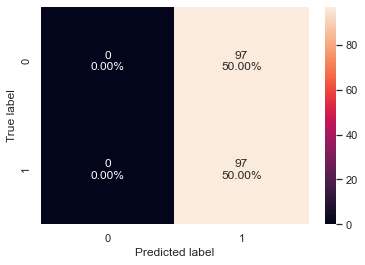

<IPython.core.display.Javascript object>

In [113]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train, y_train
)
print("Training performance:")
print(xgboost_random_train)

print("*************************************")


# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_train, y_train)

- XGBoost is very accurate

#### Random Forest Tuned:

In [114]:
%%time

# Choose the type of classifier. 
rf2 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1), 
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "max_depth":np.arange(3,4,5),
    "class_weight" : ['balanced', 'balanced_subsample'],
    "min_impurity_decrease":[0.001, 0.002, 0.003]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the random search
grid_obj = RandomizedSearchCV(rf2, parameters,n_iter=30, scoring=acc_scorer,cv=5, random_state = 1, n_jobs = -1, verbose = 2)
# using n_iter = 30, so randomized search will try 30 different combinations of hyperparameters
# by default, n_iter = 10

grid_obj = grid_obj.fit(X_train, y_train)

# Print the best combination of parameters
grid_obj.best_params_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Wall time: 6.39 s


{'n_estimators': 150,
 'min_samples_leaf': 6,
 'min_impurity_decrease': 0.001,
 'max_samples': 0.4,
 'max_features': 0.2,
 'max_depth': 3,
 'class_weight': 'balanced'}

<IPython.core.display.Javascript object>

In [115]:
grid_obj.best_score_

0.7015789473684211

<IPython.core.display.Javascript object>

In [116]:
# Set the clf to the best combination of parameters
rf2_tuned = RandomForestClassifier(
    class_weight="balanced",
    max_features=0.2,
    max_samples=0.5,
    min_samples_leaf=5,
    n_estimators=150,
    random_state=1,
    max_depth=3,
    min_impurity_decrease=0.003,
)

# Fit the best algorithm to the data.
rf2_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=0.2,
                       max_samples=0.5, min_impurity_decrease=0.003,
                       min_samples_leaf=5, n_estimators=150, random_state=1)

<IPython.core.display.Javascript object>

In [117]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train, rf2_tuned.predict(X_train)))
print(recall_score(y_val, rf2_tuned.predict(X_val)))
print("")
print("Precision on train and validation set")
# Checking precision score on train and validation set
print(precision_score(y_train, rf2_tuned.predict(X_train)))
print(precision_score(y_val, rf2_tuned.predict(X_val)))
print("")
print("Accuracy on train and validation set")
# Checking accuracy score on train and validation set
print(accuracy_score(y_train, rf2_tuned.predict(X_train)))
print(accuracy_score(y_val, rf2_tuned.predict(X_val)))

Recall on train and validation set
0.7422680412371134
0.75

Precision on train and validation set
0.9230769230769231
0.72

Accuracy on train and validation set
0.8402061855670103
0.7346938775510204


<IPython.core.display.Javascript object>

#### Gradient Boosting Tuning

In [118]:
%%time

# defining model
modelGB = GradientBoostingRegressor(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
gb_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(gb_tuned2.best_params_,gb_tuned2.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 5, 'reg_lambda': 10, 'n_estimators': 100, 'max_depth': 1, 'learning_rate': 0.01, 'gamma': 5} with CV score=1.0:
Wall time: 4.2 s


<IPython.core.display.Javascript object>

In [119]:
# building model with best parameters
gb_tuned2 = GradientBoostingRegressor(
    random_state=1, subsample=0.1, n_estimators=100, max_depth=1, learning_rate=0.01,
)

# Fit the model on training data
gb_tuned2.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=1, random_state=1,
                          subsample=0.1)

<IPython.core.display.Javascript object>

- XGBoost has a high predictive rate so it will be chosen for the pipeline.

### Pipeline

In [121]:
# to create pipeline and make_pipeline
from sklearn.pipeline import Pipeline, make_pipeline

# to use standard scaler
from sklearn.preprocessing import StandardScaler


<IPython.core.display.Javascript object>

In [122]:
X = data.drop(columns="Attrition_Flag")
X = pd.get_dummies(X)

y = data["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [123]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=5, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(4531, 35) (1133, 35) (1417, 35)


<IPython.core.display.Javascript object>

In [124]:
# pipeline takes a list of tuples as parameter. The last entry is the call to the modeling algorithm
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', XGBClassifier())
])

# "scaler" is the name assigned to StandardScaler
# "clf" is the name assigned to XGBClassifier

<IPython.core.display.Javascript object>

In [125]:
# Any element of the pipeline can be called later using the assigned name
pipeline["scaler"].fit(X_train)

StandardScaler()

<IPython.core.display.Javascript object>

In [126]:
# now the pipeline object can be used as a normal classifier
pipeline.fit(X_train, y_train)

[02:03:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=16, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

<IPython.core.display.Javascript object>

In [127]:
# pipeline object's accuracy on the train set
pipeline.score(X_train, y_train)

1.0

<IPython.core.display.Javascript object>

In [128]:
# pipeline object's accuracy on the test set
pipeline.score(X_val, y_val)

0.9682259488084731

<IPython.core.display.Javascript object>

In [129]:
# defining pipe using make_pipeline
pipe = make_pipeline(StandardScaler(), (XGBClassifier()))

<IPython.core.display.Javascript object>

In [130]:
# we can see that make_pipeline itself assigned names to all the objects
pipe.steps

[('standardscaler', StandardScaler()),
 ('xgbclassifier',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None,
                enable_categorical=False, gamma=None, gpu_id=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, reg_alpha=None,
                reg_lambda=None, scale_pos_weight=None, subsample=None,
                tree_method=None, validate_parameters=None, verbosity=None))]

<IPython.core.display.Javascript object>

In [131]:
# now you can use the pipe object as a normal classifier
pipe.fit(X_train, y_train)

[02:03:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=16, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=No

<IPython.core.display.Javascript object>

In [132]:
# pipe object's accuracy on the train set
pipe.score(X_train, y_train)

1.0

<IPython.core.display.Javascript object>

In [133]:
# pipe object's accuracy on the test set
pipe.score(X_test, y_test)

0.9654199011997178

<IPython.core.display.Javascript object>

### Conclusion

XGBoost model performance is excelant. 